In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Function to download data using yfinance
def download_data(ticker, start_date, end_date):
    df = yf.download(ticker, start=start_date, end=end_date)
    return df

In [3]:
ticker = 'PATH'  # UiPath as an example
start_date = '2022-10-14'
end_date = '2024-10-14'
n_period = 20

[*********************100%***********************]  1 of 1 completed


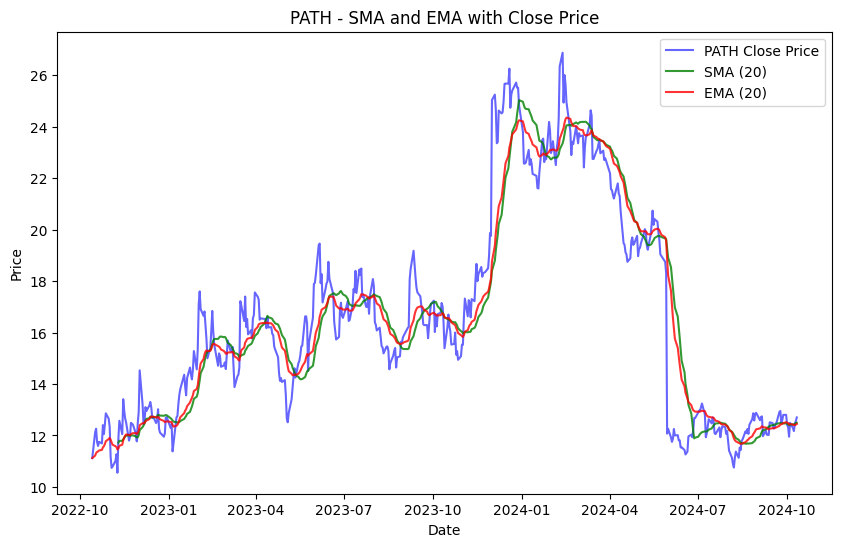

Latest Close Price: 12.699999809265137
Latest SMA (20): 12.492499923706054
Latest EMA (20): 12.445895586692707
Interpretation: The stock is trading above the SMA, indicating an uptrend.
Interpretation: The stock is trading above the EMA, suggesting short-term strength.


'sma_ema_chart_yfinance.png'

In [4]:
# Calculate Simple Moving Average (SMA)
def calculate_sma(df, n):
    df['SMA'] = df['Close'].rolling(window=n).mean()
    return df

# Calculate Exponential Moving Average (EMA)
def calculate_ema(df, n):
    df['EMA'] = df['Close'].ewm(span=n, adjust=False).mean()
    return df

# Plot SMA and EMA with transparent background
def plot_sma_ema(df, filename, ticker):
    plt.figure(figsize=(10, 6))

    # Plot closing price
    plt.plot(df.index, df['Close'], label=f'{ticker} Close Price', color='blue', alpha=0.6)

    # Plot SMA
    plt.plot(df.index, df['SMA'], label=f'SMA ({n_period})', color='green', alpha=0.8)

    # Plot EMA
    plt.plot(df.index, df['EMA'], label=f'EMA ({n_period})', color='red', alpha=0.8)

    # Add labels and title
    plt.title(f'{ticker} - SMA and EMA with Close Price')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()

    # Make background transparent
    plt.gca().patch.set_alpha(0)  # Transparent background for the plot
    plt.savefig(filename, transparent=True)
    plt.show()

# Interpretation function
def interpret_sma_ema(df):
    latest_close = df['Close'].iloc[-1]
    latest_sma = df['SMA'].iloc[-1]
    latest_ema = df['EMA'].iloc[-1]

    print(f"Latest Close Price: {latest_close}")
    print(f"Latest SMA ({n_period}): {latest_sma}")
    print(f"Latest EMA ({n_period}): {latest_ema}")

    if latest_close > latest_sma:
        print("Interpretation: The stock is trading above the SMA, indicating an uptrend.")
    else:
        print("Interpretation: The stock is trading below the SMA, indicating a potential downtrend.")

    if latest_close > latest_ema:
        print("Interpretation: The stock is trading above the EMA, suggesting short-term strength.")
    else:
        print("Interpretation: The stock is trading below the EMA, indicating short-term weakness.")

# Download data using yfinance
df = download_data(ticker, start_date, end_date)

# Calculate SMA and EMA
df = calculate_sma(df, n_period)
df = calculate_ema(df, n_period)

# Save and display the plot
plot_filename = 'sma_ema_chart_yfinance.png'
plot_sma_ema(df, plot_filename, ticker)

# Provide interpretation based on the latest SMA and EMA values
interpret_sma_ema(df)

# Save path for user download
plot_filename

In [5]:
# Calculate Bollinger Bands
def calculate_bollinger_bands(df, n):
    df['Middle_Band'] = df['Close'].rolling(window=n).mean()
    df['Std_Dev'] = df['Close'].rolling(window=n).std()
    df['Upper_Band'] = df['Middle_Band'] + (df['Std_Dev'] * 2)
    df['Lower_Band'] = df['Middle_Band'] - (df['Std_Dev'] * 2)
    return df

# Plot SMA, EMA, and Bollinger Bands with transparent background
def plot_sma_ema_bollinger(df, filename, ticker):
    plt.figure(figsize=(10, 6))

    # Plot closing price
    plt.plot(df.index, df['Close'], label=f'{ticker} Close Price', color='blue', alpha=0.6)

    # Plot SMA
    plt.plot(df.index, df['SMA'], label=f'SMA ({n_period})', color='green', alpha=0.8)

    # Plot EMA
    plt.plot(df.index, df['EMA'], label=f'EMA ({n_period})', color='red', alpha=0.8)

    # Plot Bollinger Bands
    plt.plot(df.index, df['Upper_Band'], label='Upper Bollinger Band', color='orange', alpha=0.6)
    plt.plot(df.index, df['Lower_Band'], label='Lower Bollinger Band', color='orange', alpha=0.6)

    # Fill between the bands
    plt.fill_between(df.index, df['Lower_Band'], df['Upper_Band'], color='gray', alpha=0.3)

    # Add labels and title
    plt.title(f'{ticker} - SMA, EMA, and Bollinger Bands')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()

    # Make background transparent
    plt.gca().patch.set_alpha(0)  # Transparent background for the plot
    plt.savefig(filename, transparent=True)
    plt.show()

# Interpretation function for SMA, EMA, and Bollinger Bands
def interpret_sma_ema_bollinger(df):
    latest_close = df['Close'].iloc[-1]
    latest_sma = df['SMA'].iloc[-1]
    latest_ema = df['EMA'].iloc[-1]
    latest_upper_band = df['Upper_Band'].iloc[-1]
    latest_lower_band = df['Lower_Band'].iloc[-1]

    print(f"Latest Close Price: {latest_close}")
    print(f"Latest SMA ({n_period}): {latest_sma}")
    print(f"Latest EMA ({n_period}): {latest_ema}")
    print(f"Latest Upper Bollinger Band: {latest_upper_band}")
    print(f"Latest Lower Bollinger Band: {latest_lower_band}")

    if latest_close > latest_sma:
        print("Interpretation: The stock is trading above the SMA, indicating an uptrend.")
    else:
        print("Interpretation: The stock is trading below the SMA, indicating a potential downtrend.")

    if latest_close > latest_ema:
        print("Interpretation: The stock is trading above the EMA, suggesting short-term strength.")
    else:
        print("Interpretation: The stock is trading below the EMA, indicating short-term weakness.")

    if latest_close > latest_upper_band:
        print("Interpretation: The stock is overbought (above upper Bollinger Band), a correction may follow.")
    elif latest_close < latest_lower_band:
        print("Interpretation: The stock is oversold (below lower Bollinger Band), it may bounce back.")
    else:
        print("Interpretation: The stock is trading within the Bollinger Bands, indicating normal volatility.")

[*********************100%***********************]  1 of 1 completed


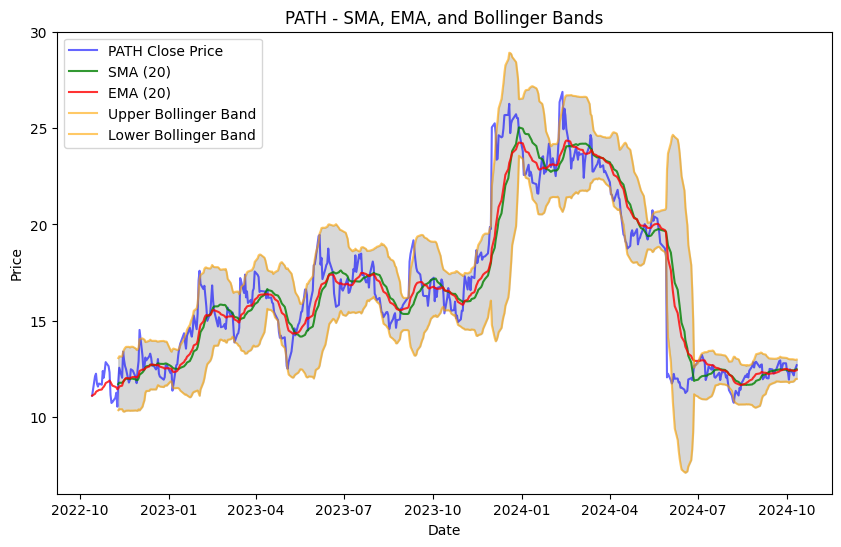

Latest Close Price: 12.699999809265137
Latest SMA (20): 12.492499923706054
Latest EMA (20): 12.445895586692707
Latest Upper Bollinger Band: 12.994197047009571
Latest Lower Bollinger Band: 11.990802800402538
Interpretation: The stock is trading above the SMA, indicating an uptrend.
Interpretation: The stock is trading above the EMA, suggesting short-term strength.
Interpretation: The stock is trading within the Bollinger Bands, indicating normal volatility.


'sma_ema_bollinger_chart.png'

In [6]:
# Download data using yfinance
df = download_data(ticker, start_date, end_date)

# Calculate SMA, EMA, and Bollinger Bands
df = calculate_sma(df, n_period)
df = calculate_ema(df, n_period)
df = calculate_bollinger_bands(df, n_period)

# Save and display the plot
plot_filename = 'sma_ema_bollinger_chart.png'
plot_sma_ema_bollinger(df, plot_filename, ticker)

# Provide interpretation based on the latest values
interpret_sma_ema_bollinger(df)

# Save path for user download
plot_filename

In [7]:
# Function to calculate RSI
def calculate_rsi(df, n):
    # Calculate price changes
    delta = df['Close'].diff()

    # Gain and loss separation
    gain = np.where(delta > 0, delta, 0)
    loss = np.where(delta < 0, -delta, 0)

    # Use rolling averages for gains and losses
    avg_gain = pd.Series(gain).rolling(window=n, min_periods=n).mean()
    avg_loss = pd.Series(loss).rolling(window=n, min_periods=n).mean()

    # Avoid division by zero in the RS calculation
    rs = np.where(avg_loss == 0, 0, avg_gain / avg_loss)

    # Calculate RSI using the RS formula
    rsi = 100 - (100 / (1 + rs))

    # Add RSI column to the DataFrame
    df['RSI'] = rsi

    # Return DataFrame with RSI
    return df

# Function to plot price and RSI
def plot_price_and_rsi(df, ticker, filename):
    plt.figure(figsize=(10, 8))

    # Plot close price
    plt.subplot(2, 1, 1)
    plt.plot(df.index, df['Close'], label=f'{ticker} Close Price', color='blue', alpha=0.6)
    plt.title(f'{ticker} Close Price')
    plt.ylabel('Price')
    plt.grid(True)
    plt.legend()

    # Plot RSI
    plt.subplot(2, 1, 2)
    plt.plot(df.index, df['RSI'], label='RSI', color='red', alpha=0.6)
    plt.axhline(70, linestyle='--', color='gray', label='Overbought (70)')
    plt.axhline(30, linestyle='--', color='gray', label='Oversold (30)')
    plt.title('Relative Strength Index (RSI)')
    plt.ylim(0, 100)
    plt.ylabel('RSI')
    plt.grid(True)
    plt.legend()

    # Adjust layout
    plt.tight_layout()

    # Save figure with transparent background and 300 DPI resolution
    plt.savefig(filename, transparent=True, dpi=300)
    plt.show()

            Close        RSI
Date                        
2024-09-16  12.48  47.260258
2024-09-17  12.27  39.862546
2024-09-18  12.30  44.736841
2024-09-19  12.45  42.352924
2024-09-20  12.49  42.352924
2024-09-23  12.91  55.970151
2024-09-24  12.95  54.440152
2024-09-25  12.48  45.723676
2024-09-26  12.59  63.025217
2024-09-27  12.80  62.869217
2024-09-30  12.80  67.420832
2024-10-01  12.40  57.307675
2024-10-02  12.33  55.805233
2024-10-03  11.95  39.062494
2024-10-04  12.49  50.162870
2024-10-07  12.29  50.326789
2024-10-08  12.17  47.936506
2024-10-09  12.44  49.847091
2024-10-10  12.56  51.044785
2024-10-11  12.70  46.579805


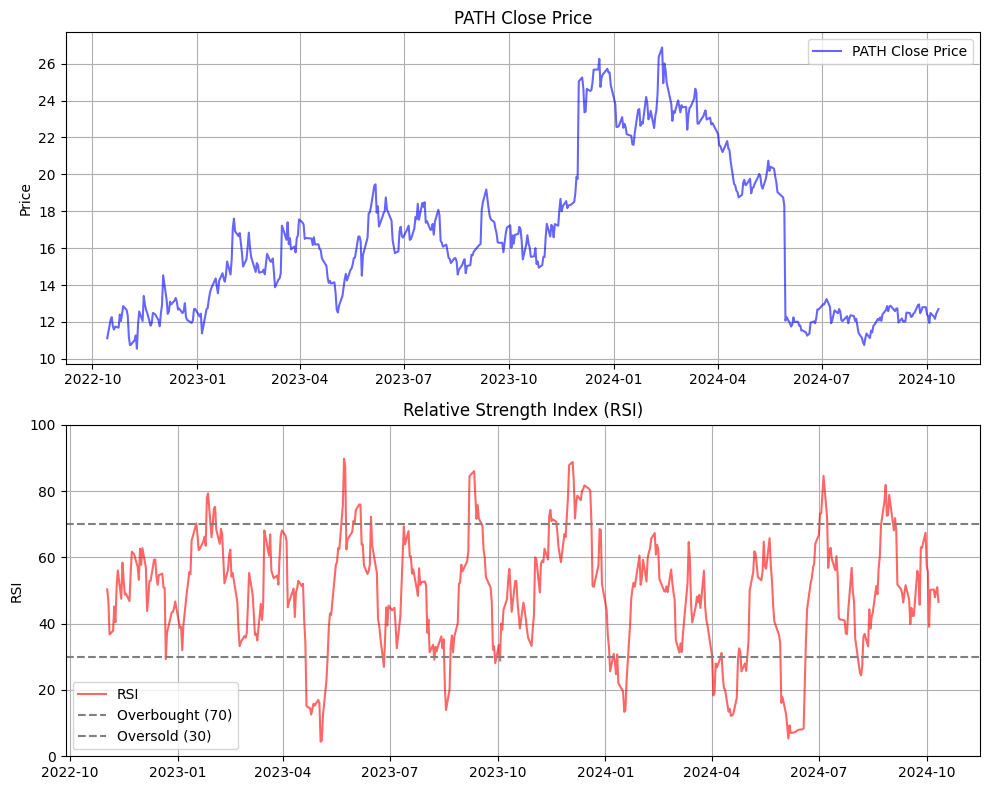

'price_rsi_chart.png'

In [8]:
# Calculate RSI for a 14-period window
df = calculate_rsi(df, 14)

# Print RSI values to verify correct calculation
print(df[['Close', 'RSI']].tail(20))  # Print last 20 values for inspection

# Save and display the plot
plot_filename = 'price_rsi_chart.png'
plot_price_and_rsi(df, ticker, plot_filename)

# Provide file path for download
plot_filename


[*********************100%***********************]  1 of 1 completed


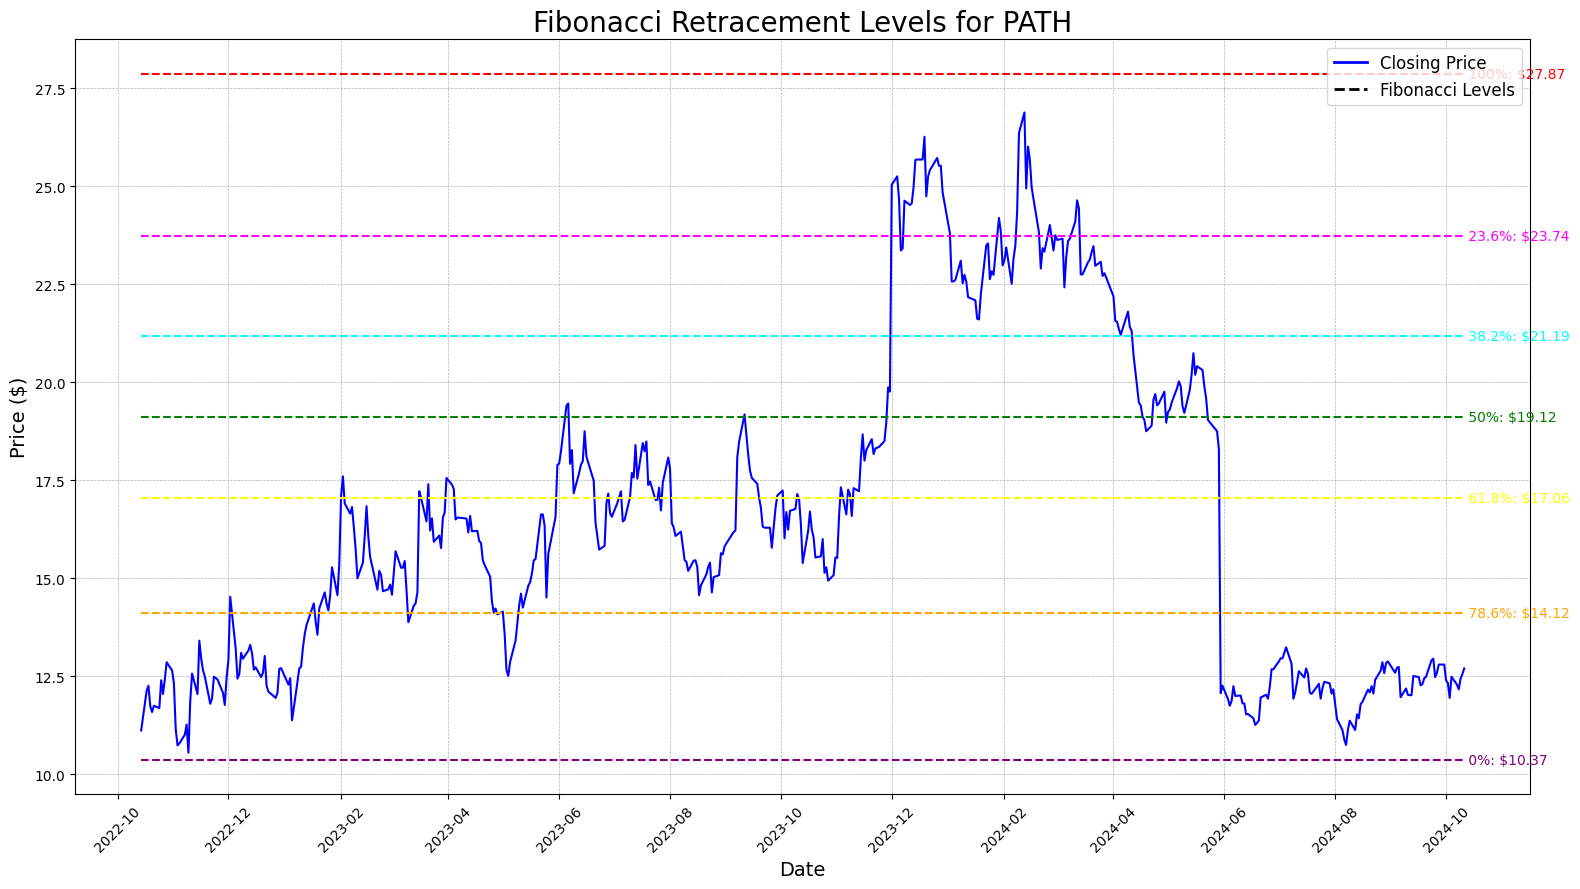

In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import matplotlib.dates as mdates

# Define the ticker symbol and the date range
ticker = 'PATH'  # Example: Apple Inc.
start_date = '2022-10-14'
end_date = '2024-10-14'

# Fetch historical data
data = yf.download(ticker, start=start_date, end=end_date)

# Calculate Fibonacci retracement levels
def calculate_fibonacci_levels(data):
    max_price = data['High'].max()
    min_price = data['Low'].min()
    diff = max_price - min_price

    # Fibonacci ratios
    levels = {
        '100%': max_price,
        '78.6%': max_price - 0.786 * diff,
        '61.8%': max_price - 0.618 * diff,
        '50%': max_price - 0.5 * diff,
        '38.2%': max_price - 0.382 * diff,
        '23.6%': max_price - 0.236 * diff,
        '0%': min_price
    }
    return levels

fib_levels = calculate_fibonacci_levels(data)

# Plot the closing price and Fibonacci levels
plt.figure(figsize=(16,9))
plt.plot(data.index, data['Close'], label='Closing Price', color='blue')

# Add Fibonacci levels
colors = ['red', 'orange', 'yellow', 'green', 'cyan', 'magenta', 'purple']
for i, (level_name, level_price) in enumerate(fib_levels.items()):
    plt.hlines(level_price, xmin=data.index[0], xmax=data.index[-1], colors=colors[i], linestyles='dashed')
    plt.text(data.index[-1], level_price, f' {level_name}: ${level_price:.2f}', va='center', fontsize=10, color=colors[i])

# Formatting the date axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))

plt.title(f'Fibonacci Retracement Levels for {ticker}', fontsize=20)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price ($)', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)

# Custom legend
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='blue', lw=2),
                Line2D([0], [0], color='black', lw=2, linestyle='dashed')]
plt.legend(custom_lines, ['Closing Price', 'Fibonacci Levels'], fontsize=12)

# Adjust layout
plt.tight_layout()

# Save the figure as a PNG with a transparent background
plt.savefig('fibonacci_retracement_AAPL.png', dpi=300, transparent=True)

# Show the plot
plt.show()


In [ ]:
!pip install tabulate
from tabulate import tabulate

In [16]:
ticker = 'PATH'
start_date = '2022-10-14'
end_date = '2024-10-14'
data = yf.download(ticker, start=start_date, end=end_date)


data['SMA_50'] = data['Close'].rolling(window=50).mean()


def calculate_rsi(data, period=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data)


def calculate_fibonacci_levels(data):
    max_price = data['High'].max()
    min_price = data['Low'].min()
    diff = max_price - min_price

    levels = {
        '100%': max_price,
        '78.6%': max_price - 0.786 * diff,
        '61.8%': max_price - 0.618 * diff,
        '50%': max_price - 0.5 * diff,
        '38.2%': max_price - 0.382 * diff,
        '23.6%': max_price - 0.236 * diff,
        '0%': min_price
    }
    return levels

fib_levels = calculate_fibonacci_levels(data)


transaction_cost = 0.001
initial_balance = 10000
balance = initial_balance
position = 0
entry_price = 0
buy_signal = fib_levels['61.8%']
sell_signal = fib_levels['23.6%']
stop_loss = fib_levels['78.6%']

#randamentele strategiei
balance_history = []
strategy_returns = []

for i in range(50, len(data)):
    price = data['Close'].iloc[i]
    sma_50 = data['SMA_50'].iloc[i]
    rsi = data['RSI'].iloc[i]

    # Intrare în poziție (buy signal)
    if position == 0 and price <= buy_signal and price > sma_50 and rsi < 70:
        position = 1
        entry_price = price
        balance -= entry_price * transaction_cost
        print(f"Buy at {price:.2f} (Transaction Cost: {entry_price * transaction_cost:.2f})")

    # Ieșire din poziție (sell signal sau stop-loss)
    if position == 1:
        if price >= sell_signal or rsi > 70:  # Take profit
            profit = (price - entry_price) / entry_price
            balance += balance * profit - price * transaction_cost
            strategy_returns.append(profit)
            position = 0
            print(f"Sell at {price:.2f} | Profit: {profit*100:.2f}% (Transaction Cost: {price * transaction_cost:.2f})")
        elif price <= stop_loss:  # Stop-loss
            loss = (price - entry_price) / entry_price
            balance += balance * loss - price * transaction_cost
            strategy_returns.append(loss)
            position = 0
            print(f"Stop-loss at {price:.2f} | Loss: {loss*100:.2f}% (Transaction Cost: {price * transaction_cost:.2f})")

    # Înregistrăm balance history
    balance_history.append(balance)

# Adăugăm în DataFrame randamentele strategiei calculate
data['Strategy Balance'] = np.nan
data['Strategy Balance'].iloc[50:] = balance_history

# Calculăm randamentele cumulative pentru strategia de trading
data['Strategy Cumulative Return'] = (data['Strategy Balance'] - initial_balance) / initial_balance

# Afișăm rezultatele finale ale strategiei
print(f"Final Balance: ${balance:.2f}")
print(f"Total Trades: {len(strategy_returns)}")
print(f"Profit/Loss from Trades: ${sum(strategy_returns) * initial_balance:.2f}")
print(f"Win Rate: {len([t for t in strategy_returns if t > 0]) / len(strategy_returns) * 100:.2f}%")
print(f"Cumulative Return: {(balance - initial_balance) / initial_balance * 100:.2f}%")


[*********************100%***********************]  1 of 1 completed

Buy at 12.69 (Transaction Cost: 0.01)
Stop-loss at 12.69 | Loss: 0.00% (Transaction Cost: 0.01)
Buy at 12.71 (Transaction Cost: 0.01)
Stop-loss at 12.71 | Loss: 0.00% (Transaction Cost: 0.01)
Buy at 12.45 (Transaction Cost: 0.01)
Stop-loss at 12.45 | Loss: 0.00% (Transaction Cost: 0.01)
Buy at 12.70 (Transaction Cost: 0.01)
Stop-loss at 12.70 | Loss: 0.00% (Transaction Cost: 0.01)
Buy at 12.75 (Transaction Cost: 0.01)
Stop-loss at 12.75 | Loss: 0.00% (Transaction Cost: 0.01)
Buy at 13.23 (Transaction Cost: 0.01)
Stop-loss at 13.23 | Loss: 0.00% (Transaction Cost: 0.01)
Buy at 13.58 (Transaction Cost: 0.01)
Stop-loss at 13.58 | Loss: 0.00% (Transaction Cost: 0.01)
Buy at 13.81 (Transaction Cost: 0.01)
Stop-loss at 13.81 | Loss: 0.00% (Transaction Cost: 0.01)
Buy at 13.90 (Transaction Cost: 0.01)
Stop-loss at 13.90 | Loss: 0.00% (Transaction Cost: 0.01)
Buy at 13.56 (Transaction Cost: 0.01)
Stop-loss at 13.56 | Loss: 0.00% (Transaction Cost: 0.01)
Buy at 14.23 (Transaction Cost: 0.01)
Se


<ipython-input-16-d5e9e76c6f14>:85: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['Strategy Balance'].iloc[50:] = balance_history
<ipython-input-16-d5e9e76c6f14>:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

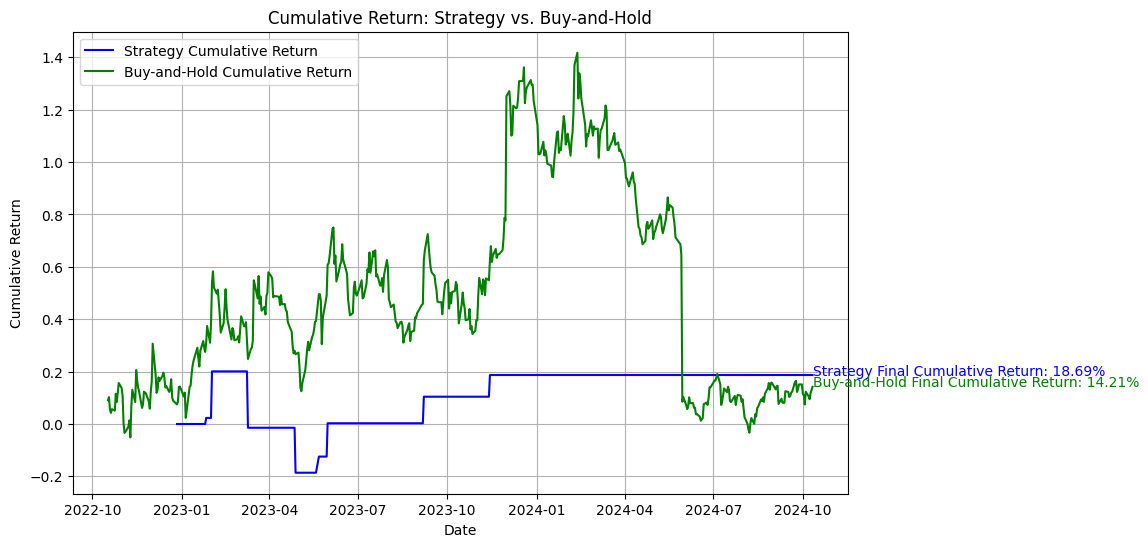

In [13]:
data['Daily Return'] = data['Close'].pct_change()
data['Buy-and-Hold Cumulative Return'] = (1 + data['Daily Return']).cumprod() - 1

# 4. Creează graficul comparativ între strategia ta și Buy-and-Hold
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Strategy Cumulative Return'], label='Strategy Cumulative Return', color='blue')
plt.plot(data.index, data['Buy-and-Hold Cumulative Return'], label='Buy-and-Hold Cumulative Return', color='green')

# 5. Adaugă titlu, etichete și legendă
plt.title('Cumulative Return: Strategy vs. Buy-and-Hold')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()

# 6. Adaugă text pentru randamentele finale în interiorul graficului
plt.text(data.index[-1], data['Strategy Cumulative Return'].iloc[-1],
         f'Strategy Final Cumulative Return: {data["Strategy Cumulative Return"].iloc[-1]*100:.2f}%', color='blue')
plt.text(data.index[-1], data['Buy-and-Hold Cumulative Return'].iloc[-1],
         f'Buy-and-Hold Final Cumulative Return: {data["Buy-and-Hold Cumulative Return"].iloc[-1]*100:.2f}%', color='green')

# 7. Afișează graficul
plt.grid(True)
plt.show()